Leaks detected in pressure sensors at timestamps: <DatetimeArray>
['2024-07-26 08:38:07.430749', '2024-07-26 08:38:08.430749',
 '2024-07-26 08:38:09.430749', '2024-07-26 08:38:10.430749',
 '2024-07-26 08:38:11.430749', '2024-07-26 08:38:12.430749',
 '2024-07-26 08:38:13.430749', '2024-07-26 08:38:14.430749',
 '2024-07-26 08:38:15.430749', '2024-07-26 08:38:16.430749',
 ...
 '2024-07-26 08:43:34.430749', '2024-07-26 08:43:50.430749',
 '2024-07-26 08:44:42.430749', '2024-07-26 08:44:45.430749',
 '2024-07-26 08:44:52.430749', '2024-07-26 08:45:12.430749',
 '2024-07-26 08:45:30.430749', '2024-07-26 08:45:45.430749',
 '2024-07-26 08:41:32.430749', '2024-07-26 08:43:35.430749']
Length: 500, dtype: datetime64[ns]
Leaks detected in temperature sensors at timestamps: <DatetimeArray>
['2024-07-26 08:38:07.430749', '2024-07-26 08:38:08.430749',
 '2024-07-26 08:38:09.430749', '2024-07-26 08:38:11.430749',
 '2024-07-26 08:38:12.430749', '2024-07-26 08:38:13.430749',
 '2024-07-26 08:38:14.430749', '

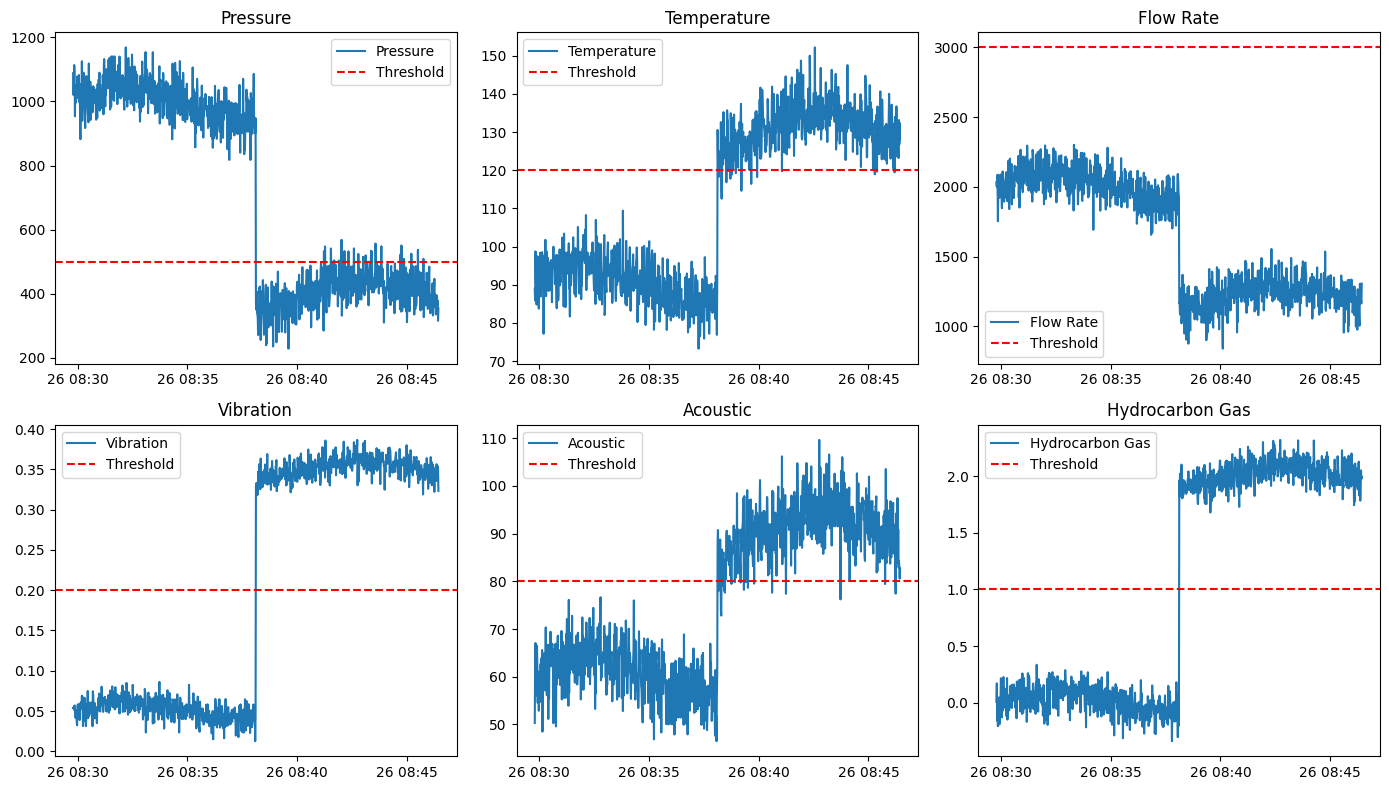

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set simulation parameters
num_sensors = 10
num_samples = 1000
leak_thresholds = {
    "pressure": 500,        # psi
    "temperature": 120,     # °F
    "flow_rate": 3000,      # barrels per hour
    "vibration": 0.2,       # inches per second
    "acoustic": 80,         # dB
    "hydrocarbon_gas": 1    # ppm
}

# Generate timestamps
start_time = datetime.now()
timestamps = [start_time + timedelta(seconds=i) for i in range(num_samples)]

# Generate synthetic data with more realistic variation
np.random.seed(0)  # For reproducibility

def generate_sensor_data(mean, std, anomaly=False):
    data = np.random.normal(mean, std, num_samples)
    if anomaly:
        data += np.sin(np.linspace(0, 10, num_samples)) * std
    return data

pressure = np.array([generate_sensor_data(1000, 50, True) for _ in range(num_sensors)])
temperature = np.array([generate_sensor_data(90, 5, True) for _ in range(num_sensors)])
flow_rate = np.array([generate_sensor_data(2000, 100, True) for _ in range(num_sensors)])
vibration = np.array([generate_sensor_data(0.05, 0.01, True) for _ in range(num_sensors)])
acoustic = np.array([generate_sensor_data(60, 5, True) for _ in range(num_sensors)])
hydrocarbon_gas = np.array([generate_sensor_data(0, 0.1, True) for _ in range(num_sensors)])

# Introduce a leak event
leak_time = 500
for i in range(leak_time, num_samples):
    pressure[:, i] -= 600
    temperature[:, i] += 40
    flow_rate[:, i] -= 800
    vibration[:, i] += 0.3
    acoustic[:, i] += 30
    hydrocarbon_gas[:, i] += 2

# Generate sensor locations
locations = [(np.random.uniform(4.0, 14.0), np.random.uniform(6.0, 13.0)) for _ in range(num_sensors)]
latitudes, longitudes = zip(*locations)

# Create a DataFrame to store the sensor data
data = {
    "timestamp": np.tile(timestamps, num_sensors),
    "sensor_id": np.repeat(range(num_sensors), num_samples),
    "latitude": np.repeat(latitudes, num_samples),
    "longitude": np.repeat(longitudes, num_samples),
    "pressure": pressure.flatten(),
    "temperature": temperature.flatten(),
    "flow_rate": flow_rate.flatten(),
    "vibration": vibration.flatten(),
    "acoustic": acoustic.flatten(),
    "hydrocarbon_gas": hydrocarbon_gas.flatten()
}

df = pd.DataFrame(data)

# Function to detect leaks
def detect_leaks(df, thresholds):
    leaks = {}
    for param, threshold in thresholds.items():
        if param in ["temperature", "acoustic", "hydrocarbon_gas"]:
            leaks[param] = df[df[param] > threshold]
        else:
            leaks[param] = df[df[param] < threshold]
    return leaks

# Detect leaks
leaks_detected = detect_leaks(df, leak_thresholds)

# Print results
for param, leaks in leaks_detected.items():
    if not leaks.empty:
        print(f"Leaks detected in {param} sensors at timestamps: {leaks['timestamp'].unique()}")
    else:
        print(f"No leaks detected in {param} sensors.")

# Plotting some sample data for visualization
plt.figure(figsize=(14, 8))

plt.subplot(231)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['pressure'], label="Pressure")
plt.axhline(y=leak_thresholds["pressure"], color='r', linestyle='--', label="Threshold")
plt.title("Pressure")
plt.legend()

plt.subplot(232)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['temperature'], label="Temperature")
plt.axhline(y=leak_thresholds["temperature"], color='r', linestyle='--', label="Threshold")
plt.title("Temperature")
plt.legend()

plt.subplot(233)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['flow_rate'], label="Flow Rate")
plt.axhline(y=leak_thresholds["flow_rate"], color='r', linestyle='--', label="Threshold")
plt.title("Flow Rate")
plt.legend()

plt.subplot(234)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['vibration'], label="Vibration")
plt.axhline(y=leak_thresholds["vibration"], color='r', linestyle='--', label="Threshold")
plt.title("Vibration")
plt.legend()

plt.subplot(235)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['acoustic'], label="Acoustic")
plt.axhline(y=leak_thresholds["acoustic"], color='r', linestyle='--', label="Threshold")
plt.title("Acoustic")
plt.legend()

plt.subplot(236)
plt.plot(df[df['sensor_id'] == 0]['timestamp'], df[df['sensor_id'] == 0]['hydrocarbon_gas'], label="Hydrocarbon Gas")
plt.axhline(y=leak_thresholds["hydrocarbon_gas"], color='r', linestyle='--', label="Threshold")
plt.title("Hydrocarbon Gas")
plt.legend()

plt.tight_layout()
plt.show()
